1. Install and import libraries and dataframes
2. Conduct any necessary cleaning, manipulations and reprocessing
2b.  Address variable scales
3. Use Elbow technique
4. Determine number of clusters to be used in k-means algorithm
5. Run the k-means algorithm
6. Attach new column to dataframe with resulting clusters
7. Create different visualizations
8. discuss how & why clusters make sense or not
9. Calculate descriptive statistics using groupby() fx
10. How could these results be useful in future steps

 1. Install and import libraries and dataframes

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
#Ensure graphs are displayed in notebook
%matplotlib inline

In [3]:
#Create path shortcut
path = r'C:\Users\dodge\24-08-27 Transportation'

In [4]:
#Open most recent dataframe
df_unsup_cars = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cars_State_Names'), index_col = 0)

In [5]:
df_unsup_cars.head(10)

,Month_ending,Year,County,State,Primary_use,Battery_BEVs,Hybrid_(PHEVs),EV_Total,Non-Electric_Total,Total_Veh,%_Electric,Proximity,State_Names
0,April,2017,Pinal,AZ,Passenger,2,0,2,254,256,0.78,Nearest,Arizona
1,April,2017,Island,WA,Passenger,108,128,236,59768,60004,0.39,Washington,Washington
2,April,2017,Clark,WA,Truck,0,0,0,77561,77561,0.00,Washington,Washington
3,April,2017,Allegheny,PA,Passenger,1,0,1,93,94,1.06,Furthest,Pennsylvania
4,April,2017,Shelby,TN,Passenger,0,1,1,109,110,0.91,Furthest,Tennessee
5,April,2017,Dale,AL,Passenger,0,1,1,65,66,1.52,Furthest,Alabama
6,April,2017,Jefferson,WA,Passenger,98,56,154,23744,23898,0.64,Washington,Washington
8,April,2017,Harnett,NC,Passenger,1,0,1,257,258,0.39,Furthest,North Carolina
9,April,2017,Salt Lake,UT,Passenger,0,1,1,289,290,0.34,Nearest,Utah
10,April,2017,Yakima,WA,Truck,0,0,0,57219,57219,0.00,Washington,Washington


2. Conduct any necessary cleaning, manipulations and reprocessing
2b.  Address variable scales

In [6]:
df_unsup_cars.shape

(17886, 13)

In [7]:
df_unsup_cars.dtypes

Month_ending           object
Year                    int64
County                 object
State                  object
Primary_use            object
Battery_BEVs            int64
Hybrid_(PHEVs)          int64
EV_Total                int64
Non-Electric_Total      int64
Total_Veh               int64
%_Electric            float64
Proximity              object
State_Names            object
dtype: object

In [8]:
#Create new dataframe keeping only integers/variables
columns = ['Year', 'Battery_BEVs', 'Hybrid_(PHEVs)', 'EV_Total', 'Non-Electric_Total', 'Total_Veh', '%_Electric']

In [9]:
df_unsup = df_unsup_cars[columns]

In [10]:
df_unsup.head(15)

,Year,Battery_BEVs,Hybrid_(PHEVs),EV_Total,Non-Electric_Total,Total_Veh,%_Electric
0,2017,2,0,2,254,256,0.78
1,2017,108,128,236,59768,60004,0.39
2,2017,0,0,0,77561,77561,0.00
3,2017,1,0,1,93,94,1.06
4,2017,0,1,1,109,110,0.91
5,2017,0,1,1,65,66,1.52
6,2017,98,56,154,23744,23898,0.64
8,2017,1,0,1,257,258,0.39
9,2017,0,1,1,289,290,0.34
10,2017,0,0,0,57219,57219,0.00


In [11]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [12]:
#Create scaled dataframe where each variable has a mean of 0 and std of 1
scaled_df = StandardScaler().fit_transform(df_unsup)

In [13]:
#View first 10 rows of scaled dataframe
print(scaled_df[:10])

[[-1.59689247 -0.09964557 -0.13050952 -0.10712053 -0.24097988 -0.23881929
  -0.28120944]
 [-1.59689247 -0.04721348  0.08071948 -0.01776928  0.29771108  0.29155224
  -0.31695834]
 [-1.59689247 -0.10063485 -0.13050952 -0.10788422  0.45876442  0.44740237
  -0.35270723]
 [-1.59689247 -0.10014021 -0.13050952 -0.10750237 -0.24243717 -0.24025734
  -0.25554357]
 [-1.59689247 -0.10063485 -0.12885929 -0.10750237 -0.24229235 -0.24011531
  -0.26929314]
 [-1.59689247 -0.10063485 -0.12885929 -0.10750237 -0.24269062 -0.24050589
  -0.2133782 ]
 [-1.59689247 -0.0521599  -0.03809683 -0.0490804  -0.02836015 -0.02895379
  -0.29404238]
 [-1.59689247 -0.10014021 -0.13050952 -0.10750237 -0.24095273 -0.23880154
  -0.31695834]
 [-1.59689247 -0.10063485 -0.12885929 -0.10750237 -0.24066308 -0.23851748
  -0.32154153]
 [-1.59689247 -0.10063485 -0.13050952 -0.10788422  0.27463881  0.26683033
  -0.35270723]]


3. Use Elbow technique

In [14]:
#Define range of potential clusters and define k-means clusters in the range assigned
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
#Apply the k-means algorithm
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))]

score

C:\Users\dodge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dodge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dodge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dodge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dodge\anaconda3\lib\site-packages\sklearn\clust

[-125202.00000000007,
 -61377.534622688414,
 -47960.07046707995,
 -35254.55655471415,
 -24191.544629403128,
 -18008.48972214356,
 -15546.236574650267,
 -13025.592927022992,
 -10596.051949493954]

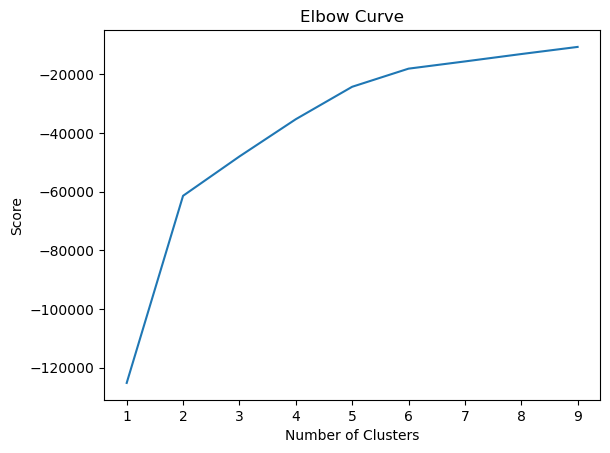

In [16]:
#Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

4. Determine the number of clusters that will be used

There is a definite shift at '2', but there continues to be a steep incline; the next shift happens at '5', but ultimately the greatest flatten happens after '6'.

5. Run the k-means algorithm

In [18]:
# Create the k-means object
kmeans = KMeans(n_clusters = 6)

In [19]:
# Fit k-means object to the data
kmeans.fit(scaled_df)

C:\Users\dodge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

6.  Attach a new column to dataframe with resulting clusters

In [20]:
#Add a new column titled clusters
scaled_df['clusters'] = kmeans.fit_predict(scaled_df)

C:\Users\dodge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [21]:
df_unsup['clusters'] = kmeans.fit_predict(df_unsup)

C:\Users\dodge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dodge\AppData\Local\Temp\ipykernel_1700\3019660591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unsup['clusters'] = kmeans.fit_predict(df_unsup)


In [22]:
df_unsup.head(10)

,Year,Battery_BEVs,Hybrid_(PHEVs),EV_Total,Non-Electric_Total,Total_Veh,%_Electric,clusters
0,2017,2,0,2,254,256,0.78,0
1,2017,108,128,236,59768,60004,0.39,5
2,2017,0,0,0,77561,77561,0.00,5
3,2017,1,0,1,93,94,1.06,0
4,2017,0,1,1,109,110,0.91,0
5,2017,0,1,1,65,66,1.52,0
6,2017,98,56,154,23744,23898,0.64,0
8,2017,1,0,1,257,258,0.39,0
9,2017,0,1,1,289,290,0.34,0
10,2017,0,0,0,57219,57219,0.00,5


In [23]:
#Check the distribution of clusters
df_unsup['clusters'].value_counts()

0    15236
5     1623
4      632
3      158
2      158
1       79
Name: clusters, dtype: int64

7. Create different visualizations

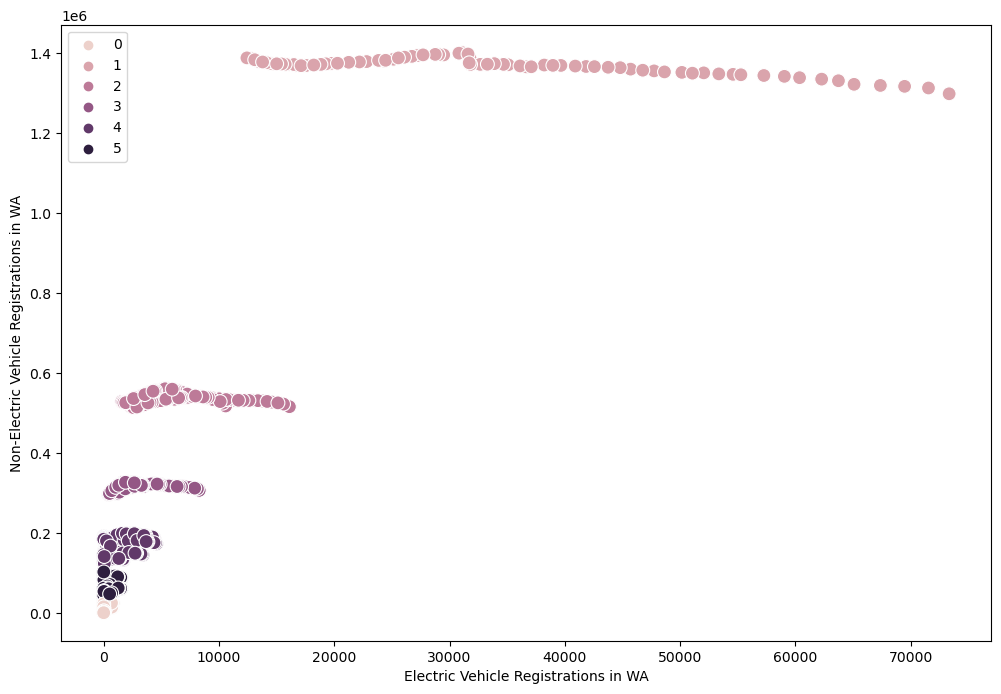

In [24]:
#Plot clusters for Electric vehicle totals and non-electric vehicle totals
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_unsup['EV_Total'], y=df_unsup['Non-Electric_Total'], hue=kmeans.labels_, s=100)

#Remove grid from the background
ax.grid(False)
plt.xlabel('Electric Vehicle Registrations in WA')
plt.ylabel('Non-Electric Vehicle Registrations in WA')
plt.show()

I'm not sure how helpful this plot is!  I know we're doing time analysis next, but I'm curious what these look like against the year.

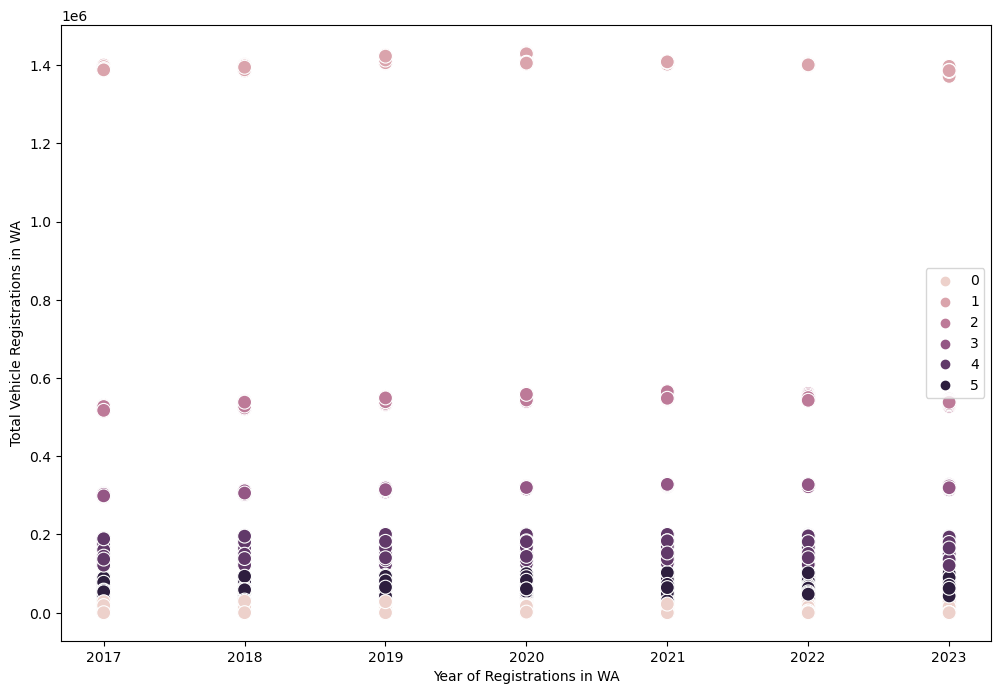

In [25]:
##Plot clusters for Year vs vehicle totals
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_unsup['Year'], y=df_unsup['Total_Veh'], hue=kmeans.labels_, s=100)

#Remove grid from the background
ax.grid(False)
plt.xlabel('Year of Registrations in WA')
plt.ylabel('Total Vehicle Registrations in WA')
plt.show()

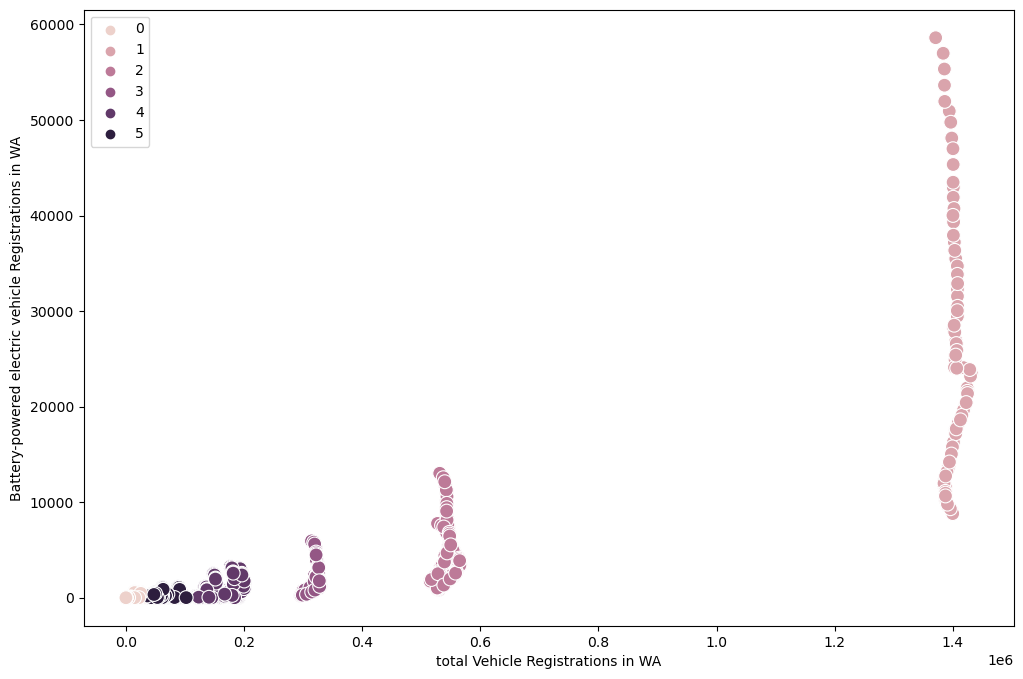

In [26]:
#Take a look at Battery Powered compared to Total Vehicles

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_unsup['Total_Veh'], y=df_unsup['Battery_BEVs'], hue=kmeans.labels_, s=100)

#Remove grid from the background
ax.grid(False)
plt.xlabel('total Vehicle Registrations in WA')
plt.ylabel('Battery-powered electric vehicle Registrations in WA')
plt.show()

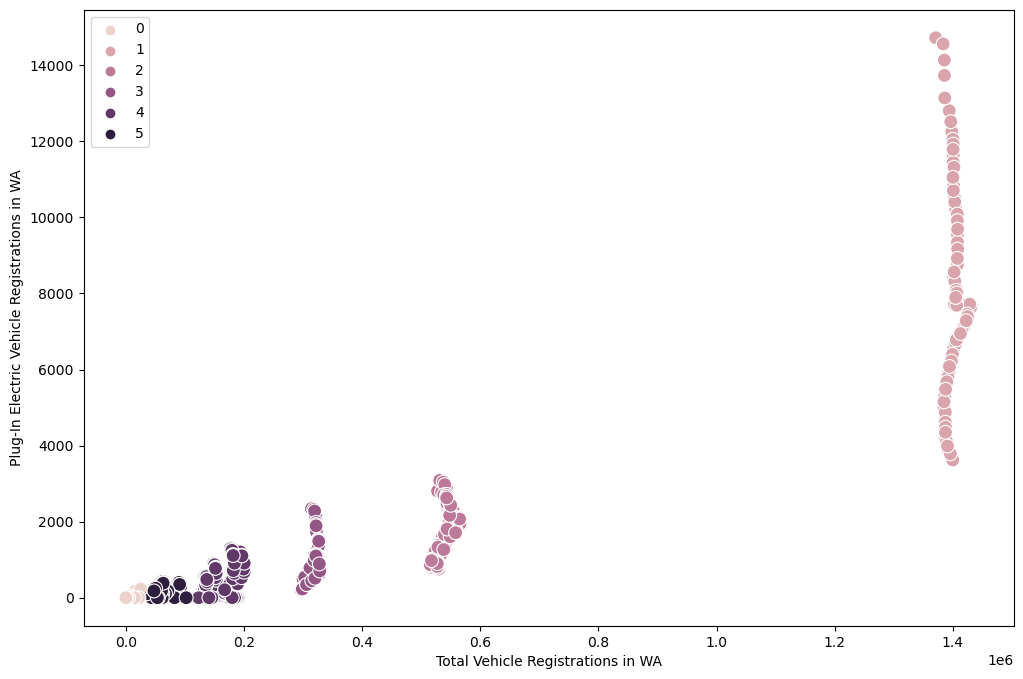

In [27]:
#Plot clusters for Plug-In Electric vehicle totals and vehicle totals
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_unsup['Total_Veh'], y=df_unsup['Hybrid_(PHEVs)'], hue=kmeans.labels_, s=100)

#Remove grid from the background
ax.grid(False)
plt.xlabel('Total Vehicle Registrations in WA')
plt.ylabel('Plug-In Electric Vehicle Registrations in WA')
plt.show()

8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.  The difficulties with these clusters and variables is that they are either time-related (years) or relational (BEVs + PHEVs = Electric Total; Non-Electric + Electric = Veh Total; Electric Total/Veh Total = % Electric.)  I think scatterplots have great value, but I still question their use on my dataset.

9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [28]:
#Use groupby() function to separate the data points in each cluster & calculate their descriptive stats
df_unsup.loc[df_unsup['clusters'] == 5, 'cluster'] = 'black'
df_unsup.loc[df_unsup['clusters'] == 4, 'cluster'] = 'dark purple'
df_unsup.loc[df_unsup['clusters'] == 3, 'cluster'] = 'purple'
df_unsup.loc[df_unsup['clusters'] == 2, 'cluster'] = 'mauve'
df_unsup.loc[df_unsup['clusters'] == 1, 'cluster'] = 'dark pink'
df_unsup.loc[df_unsup['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\dodge\AppData\Local\Temp\ipykernel_1700\1033186088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unsup.loc[df_unsup['clusters'] == 5, 'cluster'] = 'black'


In [29]:
df_unsup.groupby('cluster').agg({'EV_Total':['mean', 'median'],
                                'Non-Electric_Total':['mean', 'median'],
                                'Year':['mean', 'median'],
                                'Total_Veh':['mean', 'median'],
                                'Battery_BEVs':['mean', 'median'],
                                'Hybrid_(PHEVs)':['mean', 'median']})

EV_Total          Non-Electric_Total                    Year  \
                     mean   median               mean     median         mean   
cluster                                                                         
black          198.768946    103.0       5.609082e+04    54336.0  2019.833025   
dark pink    34263.063291  31705.0       1.367170e+06  1371025.0  2019.810127   
dark purple    895.292722    473.0       1.582535e+05   155460.0  2019.810127   
light pink       9.648858      1.0       3.119069e+03      117.0  2019.992780   
mauve         5791.303797   4957.5       5.354039e+05   535311.0  2019.810127   
purple        2507.506329   1954.0       3.136180e+05   315499.0  2019.810127   

                        Total_Veh             Battery_BEVs           \
             median          mean     median          mean   median   
cluster                                                               
black        2020.0  5.628959e+04    54547.0    124.737523     53.0   
dark pink    2020.0  1.401433e+06  1401314.0  26167.101266  24017.0   
dark purple  2020.0  1.591487e+05   156262.0    594.053797    271.0   
light pink   2020.0  3.128718e+03      119.0      6.216855      1.0   
mauve        2020.0  5.411952e+05   542793.5   4042.632911   3282.0   
purple       2020.0  3.161255e+05   319122.0   1647.810127   1187.5   

            Hybrid_(PHEVs)          
                      mean  median  
cluster                             
black            74.031423    49.0  
dark pink      8095.962025  7696.0  
dark purple     301.238924   177.5  
light pink        3.432003     1.0  
mauve          1748.670886  1707.5  
purple          859.696203   761.5

10. Propose what these results could be useful for in future steps of an analytics pipeline.

The light pink cluster has the lowest EV_total by a considerable amount as well as the lowest non-electric total; this is consistent with its lowest total vehicles.

Dark pink is the inverse cluster having the highest totals for EV/Non-electric and subsequently the highest number of total vehicles.

Battery electric vehicles outnumber the hybrid plug-in vehicles, which was previously not visualized.

Mauve cluster seems to be the second highest to dark pink.  